In [72]:
import matplotlib.pyplot as plt

def column(matrix, i):
    return [row[i] for row in matrix]

class frame:
    def __init__(self, file):
        self.end = False
        line = file.readline()
        if line == "":
            end = True;
            return
        while line != '---end---\n':
            line = file.readline()
            if line == "":
                self.end = True;
                return
        self.a = [[0 for col in range(16)] for row in range(12)]
        for i in range(12):
            line = file.readline()
            if line == "":
                self.end = True;
                return
            for j in range(16):
                self.a[i][j]=int(line[j*5:j*5+5],16)
                if self.a[i][j] > 32768:
                    self.a[i][j] -= 65536
                
    #ezt a fv kéne jóra megírni            
    def findSun_test(self):
        return [11.5, 5.6]
            
    def findSun_1(self):
        x=0
        y=0
        max = self.a[0][0]
        for i in range(1,11):
            for j in range(1,15):
                if self.a[i][j] > max:
                    max = self.a[i][j]
                    x = i
                    y = j
        
        return [x , y]
    
    def findSun_2(self):
        x=0
        y=0
        max = self.a[0][0]
        for i in range(1,11):
            for j in range(1,15):
                if self.a[i][j] > max:
                    max = self.a[i][j]
                    x = i
                    y = j
        dp = max-self.a[x+1][y]
        dm = max-self.a[x-1][y]
        x_sub= x +0.5 -(dp)/(dp+dm)
        dp = max-self.a[x][y+1]
        dm = max-self.a[x][y-1]
        y_sub= y +0.5 -(dp)/(dp+dm+0.1)
        
        return [x_sub , y_sub]

end


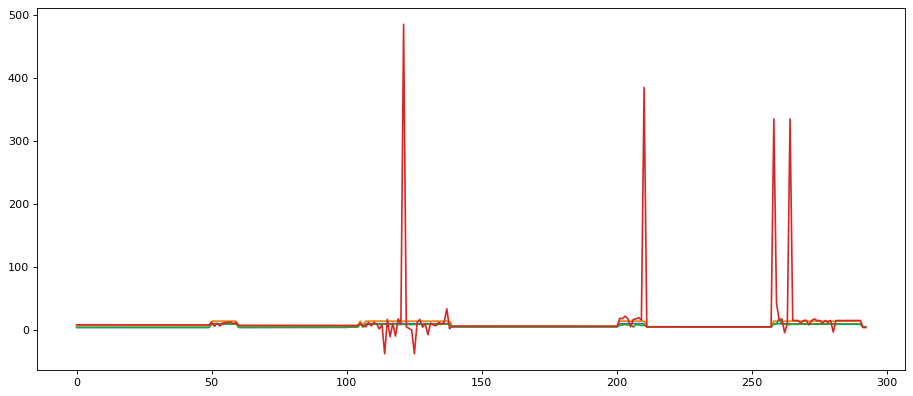

In [77]:
#f = open('test.txt', 'r')
#f = open('hex2img-20220411-105814.txt', 'r')
f = open('hex2img-20220411-170844.txt', 'r')
fps = 2

fr_time=0
dt = 1/fps

coord = []
coord2 = []
t = []

while(True):
    fr = frame(f)
    if fr.end:
        print("end")
        break
    coord.append(fr.findSun_1())
    coord2.append(fr.findSun_2())
    t.append(fr_time)
    fr_time += dt
    
#print(coord)
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(coord)
plt.plot(coord2)